In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from sklearn.manifold import TSNE
import seaborn as sns
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input
from tensorflow.data import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Part I: Data Preparation

## 1-loading the data

In [4]:
# load training data
train = pd.read_csv("/content/drive/MyDrive/DL_project1/train.csv")
# load testing data
test = pd.read_csv("/content/drive/MyDrive/DL_project1/test.csv")


## 2-Describing the Data

In [5]:
train.head() 
#to show the first 5 rows of the training data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [6]:
train.tail()
#to show the last 5 rows of the training data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930
989,1584,Quercus_Afares,0.023438,0.019531,0.031250,0.015625,0.005859,0.019531,0.035156,0.0,...,0.000000,0.000000,0.002930,0.000000,0.012695,0.000000,0.000000,0.023438,0.025391,0.022461


In [7]:
train.describe()
#to describe the training data and show statistical analysis 

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [8]:
train.columns
# columns (features) of the train data

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [10]:
train.shape

(990, 194)

In [11]:
#now for the test data :
test.head()
#to show the first 5 rows of the test data

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [12]:
test.tail()
#to show the last 5 rows of the test data

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555
593,1583,0.000000,0.117190,0.000000,0.019531,0.000000,0.136720,0.001953,0.005859,0.000000,...,0.107420,0.012695,0.016602,0.000977,0.004883,0.0,0.0,0.015625,0.000000,0.017578


In [13]:
test.describe()
#to describe the test data and show statistical analysis 

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [14]:
test.columns

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [16]:
test.shape

(594, 193)

In [88]:
# divide the train data into X (for features) and y (for labels) and drop the id column
x_train = train.drop(columns=['species','id'])
y_train = train[['species']]

In [89]:
# rename test variable and drop id column from the test dat
x_test = test.drop(columns=['id'])


In [90]:
# determine unique classes in the dataset
y_train_unique = pd.unique(y_train['species'])
# length of unique classes
y_train_unique_length = len(y_train_unique)
print('Unique Classes in the Data are',y_train_unique)
print('Number of Unique Classes is:',y_train_unique_length)

Unique Classes in the Data are ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta' 'Tilia

## 3-cleaning the data 

In [91]:
x_train['margin16'].mean()


0.00011047676767676767

In [92]:
#dropping the margin16 column since most of values for this feature=0
x_train=x_train.drop(columns=['margin16'])
x_test = x_test.drop(columns=['margin16'])

## 4- Check the data for missing values or duplicates



In [93]:
# check missing values for train data
print("Number of missing values in each column in the training data is:\n")
print(train.isna().sum())
print("\nThe sum of all missing values in all columns in the training dataframe is:",train.isna().sum().sum())

Number of missing values in each column in the training data is:

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

The sum of all missing values in all columns in the training dataframe is: 0


In [94]:
# check duplicate values for train data
print('Number of duplicated rows in the training data is:',train.duplicated().sum())

Number of duplicated rows in the training data is: 0


In [95]:
# check missing values for test data
print("Number of missing values in each column in the testing data is:\n")
print(test.isna().sum())
print("\nThe sum of all missing values in all columns in the testing dataframe is:",test.isna().sum().sum())

Number of missing values in each column in the testing data is:

id           0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

The sum of all missing values in all columns in the testing dataframe is: 0


In [96]:
# check duplicate values for test data
print('Number of duplicated rows in the testing data is:',test.duplicated().sum())

Number of duplicated rows in the testing data is: 0


## 5-Visualizing the data

In [97]:
# since the data is high dimensional we will visualize the data using TSNE
tsne = TSNE(n_components= 2, n_iter= 300, learning_rate= 20, perplexity= 20)
X_train_embedded = tsne.fit_transform(x_train)
embedded_x = X_train_embedded[:,0]
embedded_y = X_train_embedded[:,1]


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


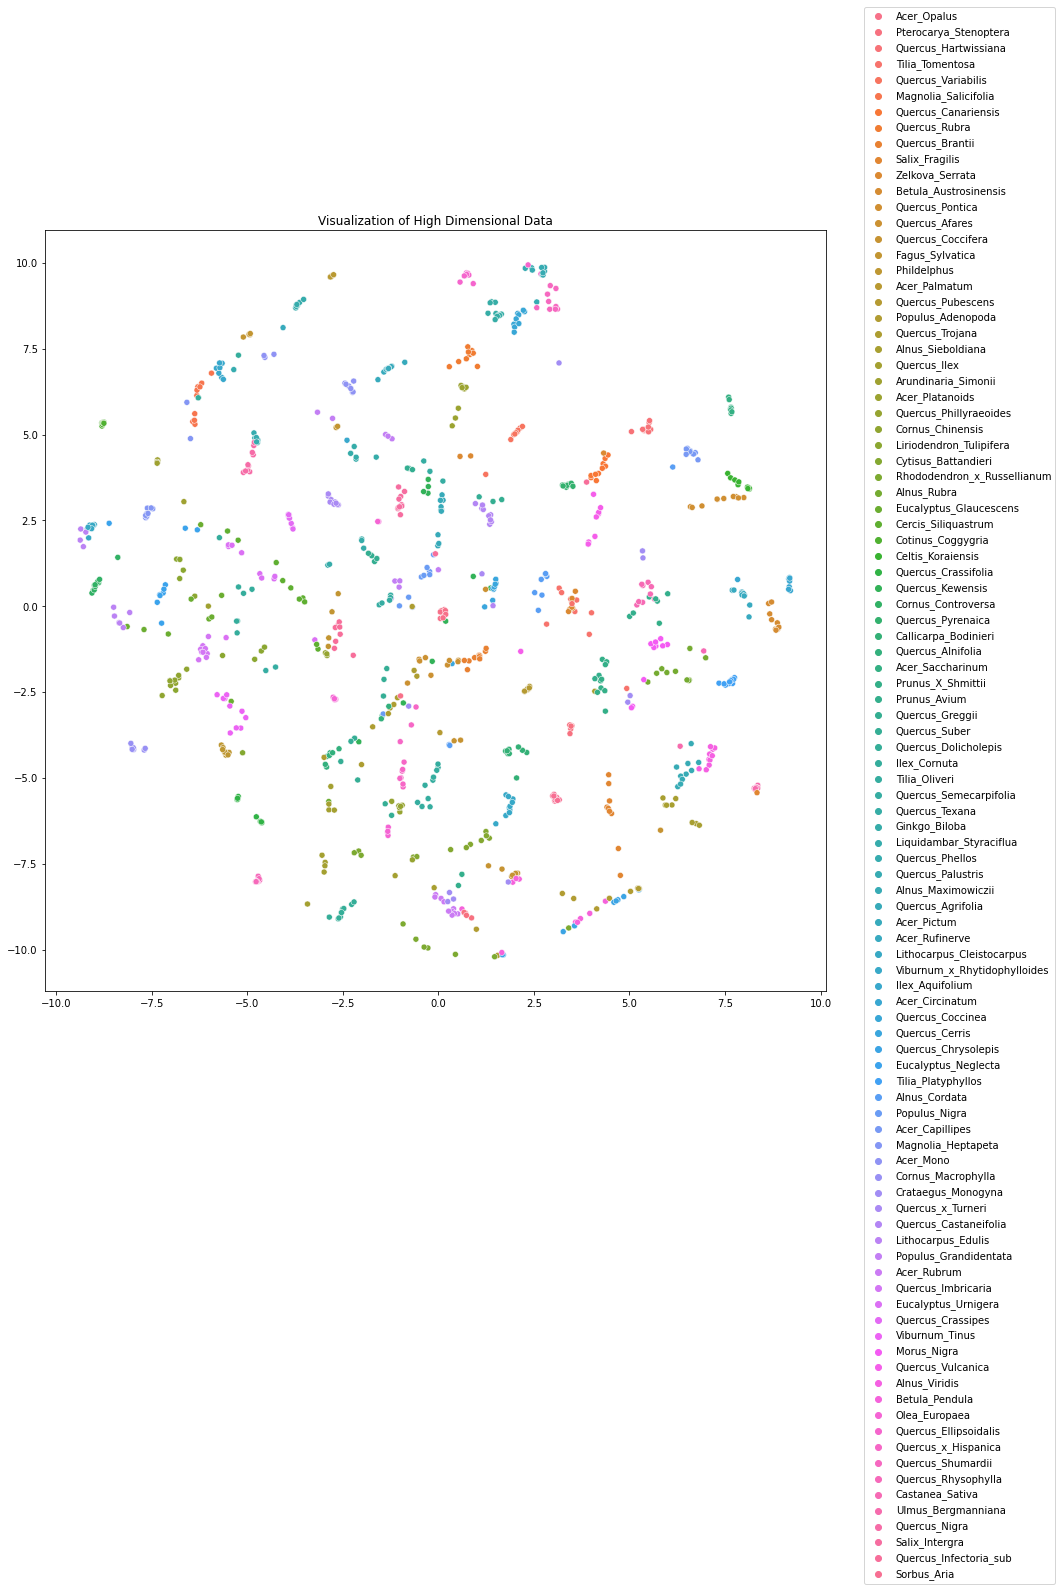

In [98]:
# visualize the data
plt.figure(figsize=(14,14))
plt.title('Visualization of High Dimensional Data')
plot = sns.scatterplot(x= embedded_x, y= embedded_y, hue= y_train['species'], legend= 'auto')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1.3))

## 6-Drawing some of the images

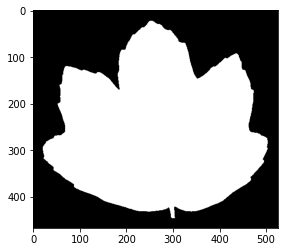

In [99]:
  img1 = plt.imread("/content/drive/MyDrive/DL_project1/images_samples/1.jpg")
  img2 = plt.imread("/content/drive/MyDrive/DL_project1/images_samples/2.jpg")
  img3 = plt.imread("/content/drive/MyDrive/DL_project1/images_samples/3.jpg")
  img4 = plt.imread("/content/drive/MyDrive/DL_project1/images_samples/4.jpg")
  img5 = plt.imread("/content/drive/MyDrive/DL_project1/images_samples/5.jpg")
  plt.imshow(img1,cmap='gray')

  

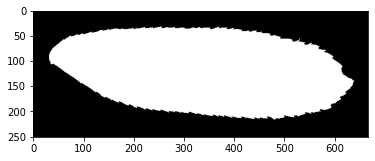

In [100]:
plt.imshow(img2,cmap='gray')

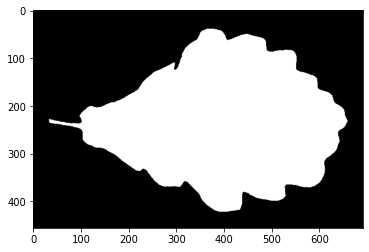

In [101]:
plt.imshow(img3,cmap='gray')

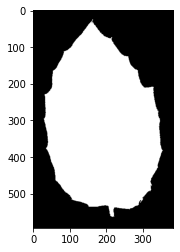

In [102]:
plt.imshow(img4,cmap='gray')

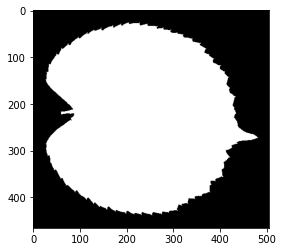

In [103]:
plt.imshow(img5,cmap='gray')

## 7-Carry out required correlation analysis

In [104]:
# view correlations between columns
correlation_matrix = x_train.corr()
correlation_matrix

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,0.020376,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,-0.127373,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,-0.014200,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,-0.039193,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


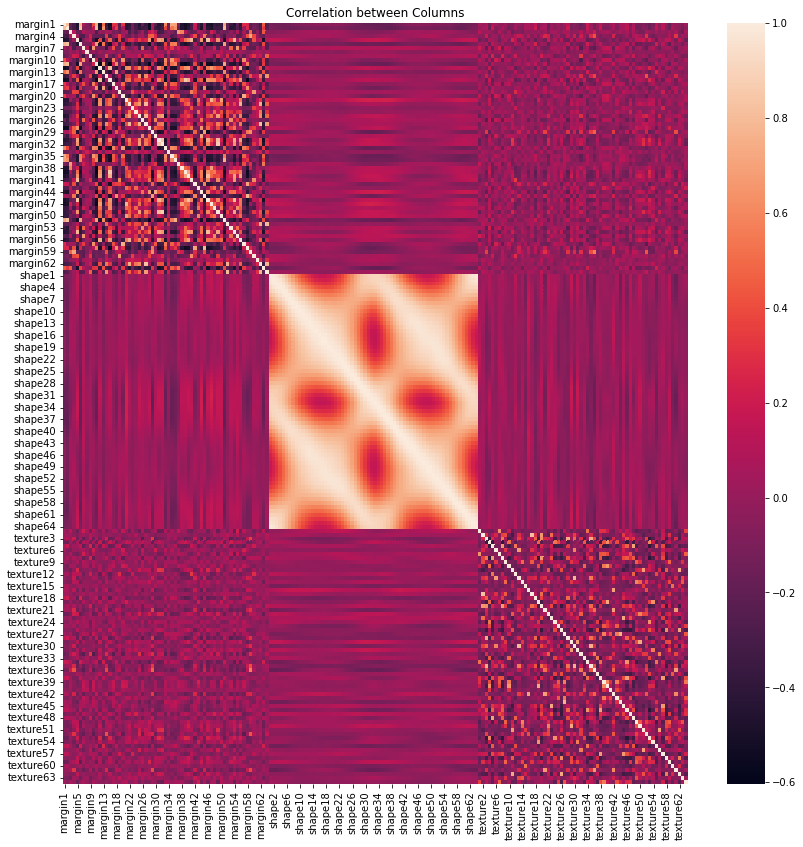

In [105]:
# visualize the correlation between columns
plt.figure(figsize=(14,14))
plt.title('Correlation between Columns')
sns.heatmap(correlation_matrix)

In [106]:
# take absolute values
correlation_matrix_abs = correlation_matrix.abs()
upper_matrix = correlation_matrix_abs.where(np.triu(np.ones(correlation_matrix_abs.shape),k=1).astype(np.bool_))
# check to see if there is a column has a correlation higher than 0.95
correlation_threshold = 0.95
col_with_high_correlation = [col for col in upper_matrix.columns if np.any(upper_matrix[col] > correlation_threshold)]
print('Columns in the Data that has high correlations are:\n',col_with_high_correlation)

Columns in the Data that has high correlations are:
 ['shape2', 'shape3', 'shape4', 'shape5', 'shape6', 'shape7', 'shape8', 'shape9', 'shape10', 'shape11', 'shape12', 'shape13', 'shape14', 'shape15', 'shape16', 'shape17', 'shape18', 'shape19', 'shape20', 'shape21', 'shape22', 'shape23', 'shape24', 'shape25', 'shape26', 'shape27', 'shape28', 'shape29', 'shape30', 'shape31', 'shape32', 'shape33', 'shape34', 'shape35', 'shape36', 'shape37', 'shape38', 'shape39', 'shape40', 'shape41', 'shape42', 'shape43', 'shape44', 'shape45', 'shape46', 'shape47', 'shape48', 'shape49', 'shape50', 'shape51', 'shape52', 'shape53', 'shape54', 'shape55', 'shape56', 'shape57', 'shape58', 'shape59', 'shape60', 'shape61', 'shape62', 'shape63', 'shape64']


We can see that all Shape columns (except shape1) has very high correlations with each other as we set a high correlation threshold with 0.95, so we will drop all Shape columns from the data and this will help to reduce the complexity of data

In [107]:
# drop shape columns (except shape1) from X_train and also X_test
x_train = x_train.drop(columns=col_with_high_correlation)
x_test = x_test.drop(columns=col_with_high_correlation)

In [108]:
x_train.shape

(990, 128)

In [109]:
X_test.shape

(594, 128)

 ## 8- divide the data into a training and test set using approximately 80% for training. 

Data is divided already in kaggle into a Train and Test data so we don't need to apply any divide process here

## 9-Standardize the data, by computing the mean and standard deviation for each feature dimension using the training set only, then subtracting the mean and dividing by the stdev for each feature and each sample

In [117]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), index = x_train.index, columns = x_train.columns)

In [151]:
# view the X_train after standradization
x_train_scaled

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,-0.486611,-0.131357,-0.330956,-0.682244,-0.138444,-0.554066,0.465218,-0.395064,-0.584019,0.906636,...,-0.452710,-0.260149,-0.560872,-0.345848,1.242752,-0.233151,-0.235610,-0.394871,-0.652143,0.262397
1,-0.585602,-0.734880,-0.028561,-0.269558,0.605389,-0.704306,0.018812,-0.395064,-0.802765,-0.674054,...,-0.560567,-0.260149,-0.687151,-0.423884,0.478218,-0.233151,-0.235610,-0.494974,2.181670,0.133641
2,-0.585602,-0.483408,-0.482192,-0.544694,-0.563515,-0.629196,2.808662,-0.395064,-0.802765,1.636190,...,1.858873,-0.260149,-0.434636,-0.423884,-0.541291,-0.233151,-0.235610,-0.520012,0.835641,-0.724631
3,-0.882575,-0.634302,-0.330956,-0.613469,0.392826,-0.366289,0.242044,-0.395064,0.728566,-0.066082,...,-0.575984,-0.209558,-0.687151,-0.462921,0.287052,-0.233151,-0.235610,-0.069525,-0.652143,1.249425
4,-0.585602,-0.634302,0.651866,-0.475883,-0.032190,-0.441400,-0.762355,-0.395064,-0.802765,-0.795636,...,0.949628,-0.260149,0.238782,-0.462921,-1.050981,-0.233151,-0.235610,-0.520012,-0.652143,0.519866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2.186354,2.332949,-0.935823,-0.682244,-0.776023,2.112575,-0.092775,-0.395064,-0.584019,1.514608,...,3.245778,-0.260149,0.785964,-0.462921,-0.350125,-0.233151,-0.235610,-0.520012,-0.652143,-0.038005
986,-0.783584,-0.634302,-0.406593,2.963011,-0.669769,-0.741862,-1.097116,-0.395064,2.478642,-0.917218,...,2.120821,-0.260149,0.112546,-0.462921,-0.286381,-0.233151,-0.235610,-0.494974,-0.652143,0.090707
987,-0.783584,-0.634302,-1.238218,-0.063233,3.474413,-0.666751,-0.650767,-0.395064,-0.365274,-1.160382,...,-0.498930,-0.209558,-0.476700,0.629651,0.032207,-0.103212,-0.235610,0.180757,-0.652143,-0.767565
988,-0.882575,-0.734880,0.576267,1.174824,-0.244698,-0.741862,-1.097116,-0.395064,3.353624,-1.038800,...,0.733884,1.307466,-0.645044,-0.345848,-0.095280,-0.233151,3.445062,-0.520012,-0.510460,-0.724631


In [152]:

# apply the transformation to the X_test data
x_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)


In [153]:
# view the X_test after standradization
x_test_scaled

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.107387,-0.483408,1.785924,-0.407108,-0.563515,-0.441400,-0.762355,-0.395064,-0.146528,0.298726,...,-0.468111,-0.260149,-0.013733,-0.423884,-0.031537,-0.233151,-0.23561,-0.520012,-0.368776,1.506894
1,-0.486611,-0.584012,1.256694,-0.475883,-0.563515,-0.478955,-0.650767,-0.395064,2.916133,0.298726,...,-0.575984,-0.260149,-0.392528,-0.384886,-0.158959,-0.233151,-0.23561,-0.494974,2.039986,1.120669
2,-0.882575,-0.734880,-1.162619,-0.063233,1.455476,-0.741862,0.242044,-0.395064,0.509820,-0.795636,...,1.458218,-0.260149,-0.645044,-0.462921,-1.050981,-0.233151,-0.23561,-0.119577,-0.652143,-0.853387
3,-0.882575,-0.734880,-0.860185,-0.407108,0.180318,-0.741862,-0.873942,-0.395064,-0.365274,-1.038800,...,-0.375656,0.548954,-0.560872,0.980829,-0.158959,-0.233151,-0.23561,1.782500,-0.652143,-0.467163
4,-0.783584,-0.734880,-0.633389,-0.475883,1.349168,-0.741862,-0.539123,-0.395064,-0.146528,-1.160382,...,-0.575984,1.964897,0.028374,-0.033708,1.625084,-0.233151,-0.23561,-0.319807,0.056346,-0.510096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.882575,-0.734880,-1.087020,-0.269558,1.455476,-0.741862,-0.092775,-0.395064,-0.146528,-0.309246,...,0.980447,-0.260149,-0.476700,-0.462921,-0.796136,-0.233151,-0.23561,-0.044487,-0.652143,-0.810454
590,-0.882575,-0.634302,-1.087020,-0.613469,0.180318,-0.741862,-0.092775,1.742148,-0.802765,-0.795636,...,-0.375656,-0.007295,-0.476700,-0.345848,-0.413804,-0.233151,-0.23561,1.807513,-0.652143,-0.123828
591,0.008396,0.019511,-0.633389,-0.338333,-0.563515,-0.441400,0.353631,-0.395064,-0.802765,-0.552410,...,0.579776,-0.260149,0.533405,-0.462921,-0.923558,-0.233151,-0.23561,-0.520012,2.465109,-0.552986
592,-0.189587,-0.483408,1.105497,0.074353,1.136660,-0.253604,1.134741,-0.395064,-0.365274,0.298726,...,-0.514347,-0.260149,-0.645044,-0.462921,-0.286381,-0.233151,-0.23561,-0.520012,0.198030,-0.038005


## 10-Encode the labels

In [122]:
y_train_encoded = pd.get_dummies(y_train)
# view of the labels after doing one hot encoding
y_train_encoded

,species_Acer_Capillipes,species_Acer_Circinatum,species_Acer_Mono,species_Acer_Opalus,species_Acer_Palmatum,species_Acer_Pictum,species_Acer_Platanoids,species_Acer_Rubrum,species_Acer_Rufinerve,species_Acer_Saccharinum,...,species_Salix_Fragilis,species_Salix_Intergra,species_Sorbus_Aria,species_Tilia_Oliveri,species_Tilia_Platyphyllos,species_Tilia_Tomentosa,species_Ulmus_Bergmanniana,species_Viburnum_Tinus,species_Viburnum_x_Rhytidophylloides,species_Zelkova_Serrata
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Part2: Training a neural network

In [124]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs['accuracy'] > 0.99:
            print('\nReached required accuracy above 99% at epoch', epochs, ', so cancel training!')
            self.model.stop_training = True

## Model Architecture

In [123]:
def DenseMLP(input_shape, hidden_size, output_size, dropout_rate, dropout = False):
    if dropout:
        # (batch_size,input_shape[0],input_shape[1])
        model = Sequential([
        # input layer
        Input(shape=(input_shape[-1])),
        # one hidden layer
        Dense(units = hidden_size, activation = 'tanh'),
        # dropout layer
        Dropout(rate = dropout_rate),
        # output layer
        Dense(units = output_size, activation = 'softmax')
        ])
    else:
        model = Sequential([
        # input layer
        Input(shape=(input_shape[-1])),
        # one hidden layer
        Dense(units = hidden_size, activation = 'tanh'),
        # output layer
        Dense(units = output_size, activation = 'softmax')
        ])
    
    return model

## Training Function

In [125]:
# define the training function which accepts many hyperparameters
def training(model, X, y, batch_size, optimizer, learning_rate_scheduler, custom_call_back):
    # compile the model
    model.compile(optimizer = optimizer, loss = CategoricalCrossentropy(), metrics = ['accuracy'])
    # callbacks
    if learning_rate_scheduler is not None:
        lr_scheduler_callback = learning_rate_scheduler
        if custom_call_back is None:
            history = model.fit(x= X,y= y, batch_size= batch_size, epochs = 500, verbose= 0, 
                            callbacks= [lr_scheduler_callback], validation_split= 0.2)
        else:
            on_epoch_end_callback = Mycallback()
            # model fit
            history = model.fit(x= X,y= y, batch_size= batch_size, epochs = 500, verbose= 0, 
                                callbacks= [lr_scheduler_callback, on_epoch_end_callback], validation_split= 0.2)
    else:
        if custom_call_back is None:
            history = model.fit(x= X,y= y, batch_size= batch_size, epochs = 500, verbose= 0, validation_split= 0.2)
        else:
            on_epoch_end_callback = Mycallback()
            # model fit
            history = model.fit(x= X,y= y, batch_size= batch_size, 
                                epochs = 500, verbose= 0, callbacks= [on_epoch_end_callback], validation_split= 0.2)
    return history

## Evaluation Function

In [126]:
# define the evaluation function which loads the trained model and evaluate its performance on train/test set
def evaluation(model, X, y, batch_size):
    results = model.evaluate(x= X, y= y, batch_size = batch_size, verbose= 0)
    return results[0], results[1]

## Training Curves Function

In [127]:
def train_curves(history, special_title, special_title_var):
    if special_title_var is None:
        title_loss = 'Model loss per epoch ' + special_title
        title_accuracy = 'Model accuracy per epoch ' + special_title
    else:    
        title_loss = 'Model loss per epoch ' + special_title + ' ' + str(special_title_var)
        title_accuracy = 'Model accuracy per epoch ' + special_title + ' ' + str(special_title_var)
    fig , axis = plt.subplots(nrows=1, ncols=2)
    # dimensions of figure
    fig.set_figheight(6)
    fig.set_figwidth(14)
    # loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    # accuracy
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epoch = np.arange(150)
    # loss curve
    axis[0].plot(loss,label='Train')
    axis[0].plot(val_loss,label='Validation')
    axis[0].set_xlabel('epoch')
    axis[0].set_ylabel('loss')
    axis[0].set_title(title_loss)
    axis[0].legend()
    # accuracy curve
    axis[1].plot(accuracy, label='Train')
    axis[1].plot(val_accuracy, label='Validation')
    axis[1].set_xlabel('epoch')
    axis[1].set_ylabel('accuracy')
    axis[1].set_title(title_accuracy)
    axis[1].legend()

## Hyperparameters settings #1 : Learning rate Tuning

Choosing the best learning rate amongst different values, to be used in the rest of the notebook using LearningRateScheduler

In [129]:
LEARNING_RATE_SCHEDULAR = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
batch_size = 64
HIDDEN_SIZE = 128
OPTIMIZER = SGD(learning_rate=1e-8)
DROPOUT_RATE = 0
DROPOUT = False

In [130]:
model = DenseMLP(input_shape= X_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
history = training(model, tf.cast(X_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), batch_size, 
                       OPTIMIZER, LEARNING_RATE_SCHEDULAR, None)

Text(0, 0.5, 'Loss')

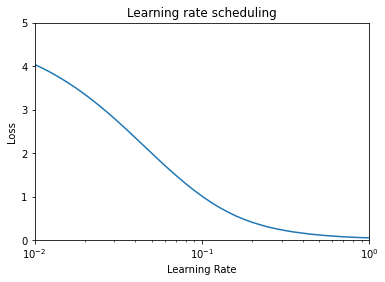

In [132]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs,history.history['loss'])
plt.axis([1e-2,1,0,5])
plt.title('Learning rate scheduling')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

We will choose 4 different learning rate values 6e-2 , 8e-2, 2e-1 and 5e-1 as at these values from the graph the loss is lowest as possible

In [133]:
BATCH_SIZE = 64
HIDDEN_SIZE = 128
learning_rate = [6e-2,8e-2,2e-1,5e-1]
DROPOUT_RATE = 0
DROPOUT = False

Start training for learning rate = 0.06

The Evaluation of the model on the train data is:
Train loss = 0.04197200760245323
Train accuracy = 0.9909090995788574

End training for learning rate = 0.06

Start training for learning rate = 0.08

The Evaluation of the model on the train data is:
Train loss = 0.033733539283275604
Train accuracy = 0.991919219493866

End training for learning rate = 0.08

Start training for learning rate = 0.2

The Evaluation of the model on the train data is:
Train loss = 0.02690882608294487
Train accuracy = 0.991919219493866

End training for learning rate = 0.2

Start training for learning rate = 0.5

The Evaluation of the model on the train data is:
Train loss = 0.01876450516283512
Train accuracy = 0.9939393997192383

End training for learning rate = 0.5



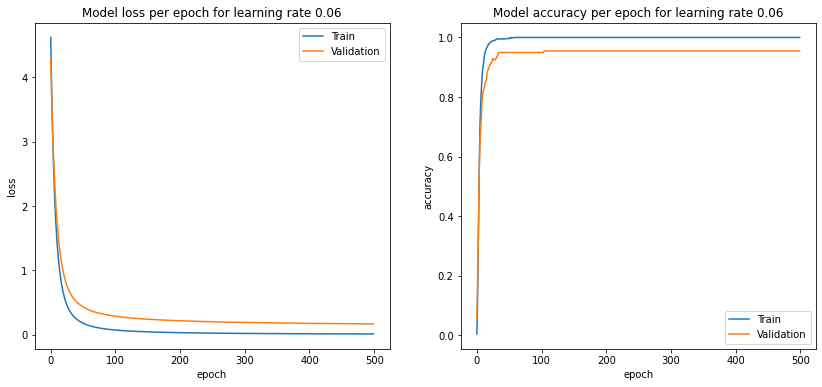

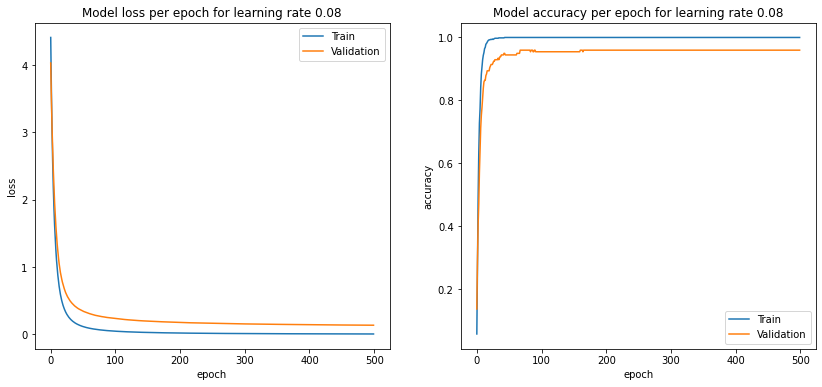

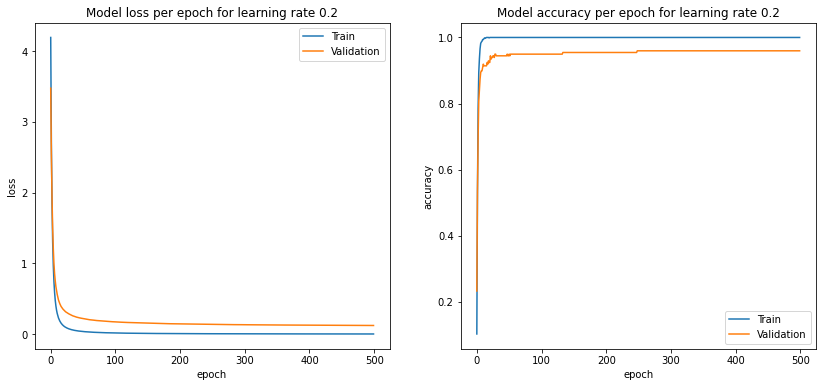

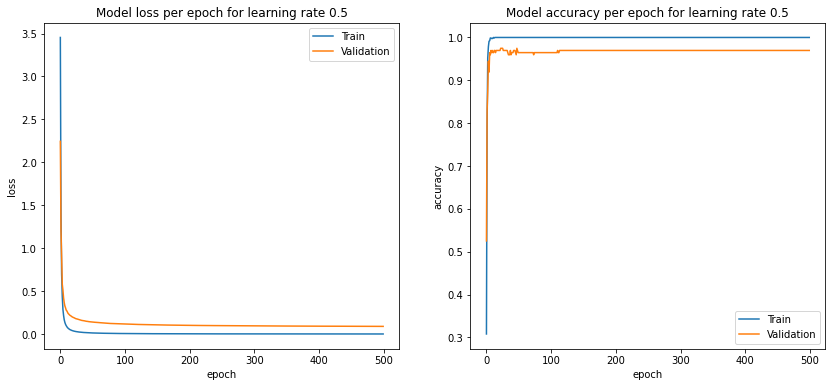

In [135]:
#trainig model 1
for lr in learning_rate:
    print('Start training for learning rate =', str(lr))
    OPTIMIZER = SGD(learning_rate=lr)
    model = DenseMLP(input_shape= x_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                         dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
    history = training(model, tf.cast(x_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), BATCH_SIZE, 
                           OPTIMIZER, None, None)
    train_curves(history,'for learning rate',lr)
    loss, acc = evaluation(model= model, X= x_train_scaled, y= y_train_encoded, batch_size= BATCH_SIZE)
    print('\nThe Evaluation of the model on the train data is:')
    print('Train loss =',loss)
    print('Train accuracy =', acc)
    print('\nEnd training for learning rate =', str(lr) + '\n')

So, from above the best learning rate to be used is 8e-2

## Hyperparameters settings #2 : Batch size Tuning

In [136]:
batch_size = [32, 64, 128, 256]
HIDDEN_SIZE = 128
LEARNING_RATE = 8e-2
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
DROPOUT_RATE = 0
DROPOUT = False

Start training for Batch size = 32

The Evaluation of the model on the train data is:
Train loss = 0.028885217383503914
Train accuracy = 0.991919219493866

End training for Batch size = 32

Start training for Batch size = 64

The Evaluation of the model on the train data is:
Train loss = 0.034815721213817596
Train accuracy = 0.991919219493866

End training for Batch size = 64

Start training for Batch size = 128

The Evaluation of the model on the train data is:
Train loss = 0.048929888755083084
Train accuracy = 0.9898989796638489

End training for Batch size = 128

Start training for Batch size = 256

The Evaluation of the model on the train data is:
Train loss = 0.061759524047374725
Train accuracy = 0.9898989796638489

End training for Batch size = 256



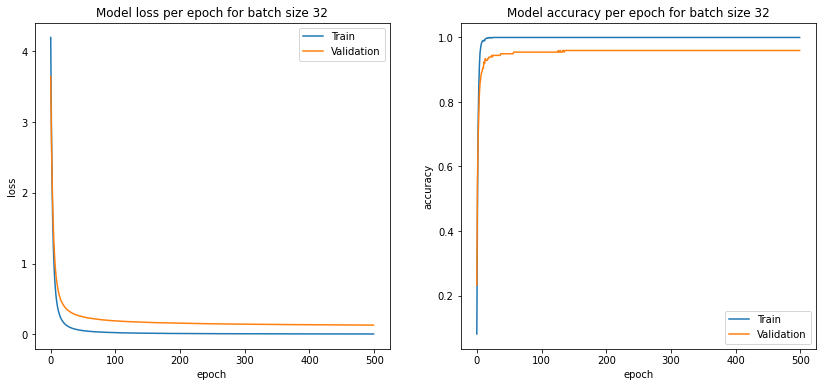

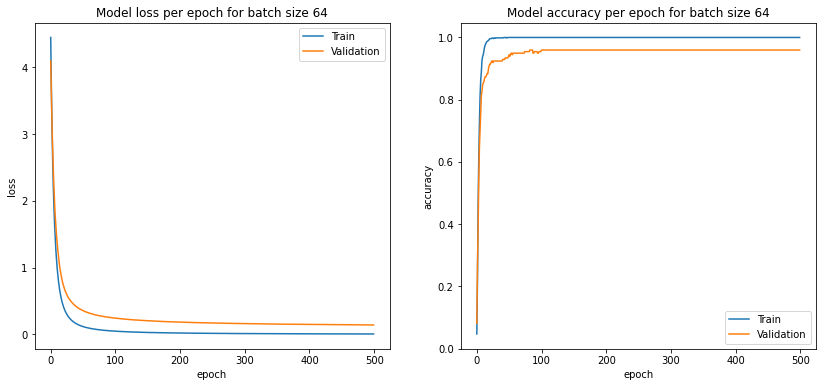

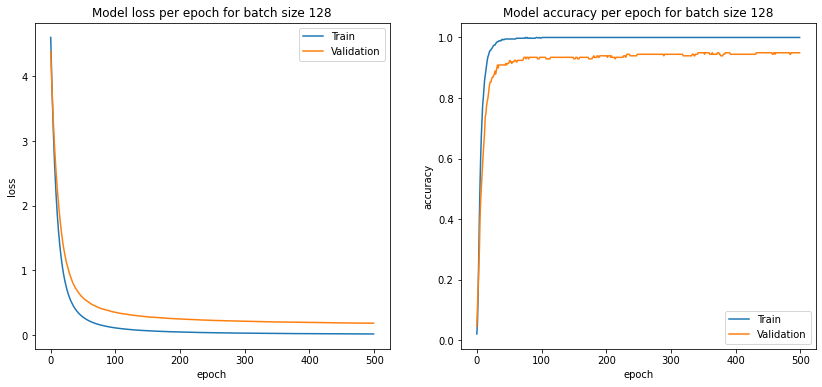

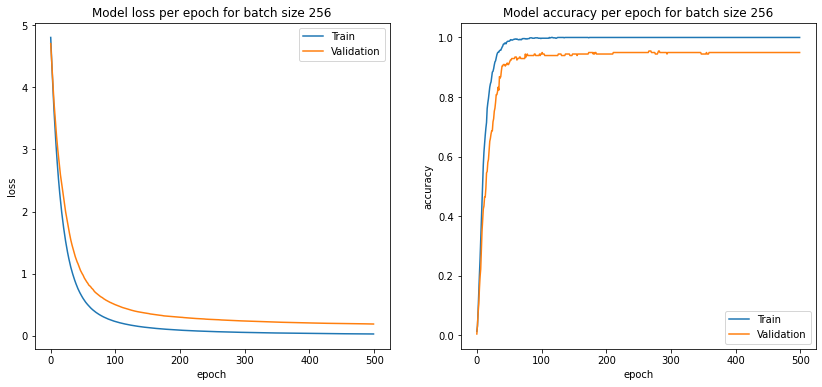

In [138]:
#training model 2
for batch in batch_size:
    print('Start training for Batch size =', str(batch))
    model = DenseMLP(input_shape= x_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
    history = training(model, tf.cast(x_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), batch, 
                       OPTIMIZER, None,None)
    train_curves(history,'for batch size',batch)
    loss, acc = evaluation(model= model, X= x_train_scaled, y= y_train_encoded, batch_size= batch)
    print('\nThe Evaluation of the model on the train data is:')
    print('Train loss =',loss)
    print('Train accuracy =', acc)
    print('\nEnd training for Batch size =', str(batch) + '\n')

So, from above the best batch size to be used is 32

## Hyperparameters settings #3 : Hidden size Tuning

We will explore second hyperparameter which is Hidden size while keeping all other hyperparameters fixed

In [139]:
BATCH_SIZE = 32
hidden_size = [32, 64, 128, 256, 512]
LEARNING_RATE = 8e-2
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
DROPOUT_RATE = 0
DROPOUT = False

Start training for Hidden size = 32

The Evaluation of the model on the train data is:
Train loss = 0.058584343641996384
Train accuracy = 0.9858585596084595

End training for Batch size = 32

Start training for Hidden size = 64

The Evaluation of the model on the train data is:
Train loss = 0.03479497879743576
Train accuracy = 0.991919219493866

End training for Batch size = 64

Start training for Hidden size = 128

The Evaluation of the model on the train data is:
Train loss = 0.026404336094856262
Train accuracy = 0.9939393997192383

End training for Batch size = 128

Start training for Hidden size = 256

The Evaluation of the model on the train data is:
Train loss = 0.023284364491701126
Train accuracy = 0.9949495196342468

End training for Batch size = 256

Start training for Hidden size = 512

The Evaluation of the model on the train data is:
Train loss = 0.01986624486744404
Train accuracy = 0.9959595799446106

End training for Batch size = 512



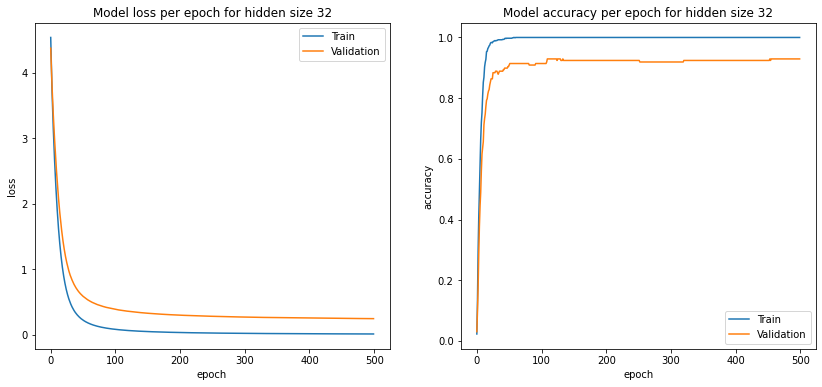

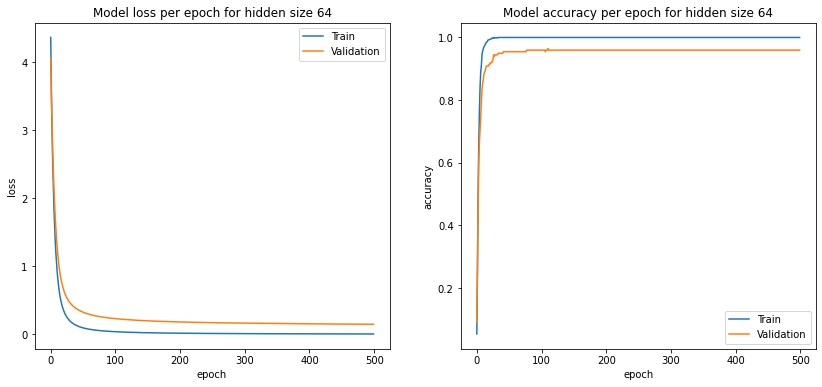

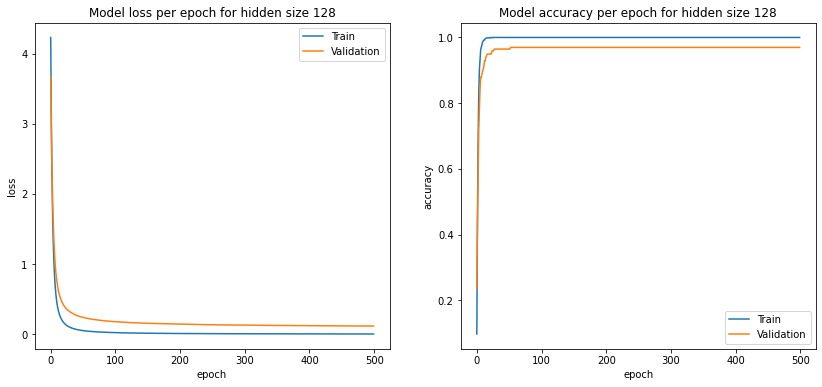

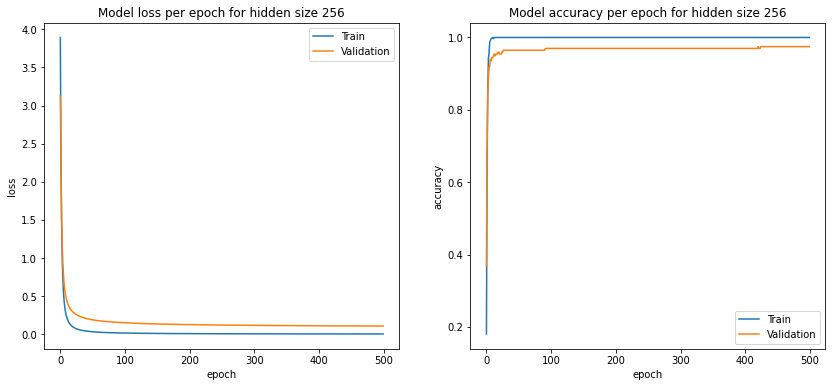

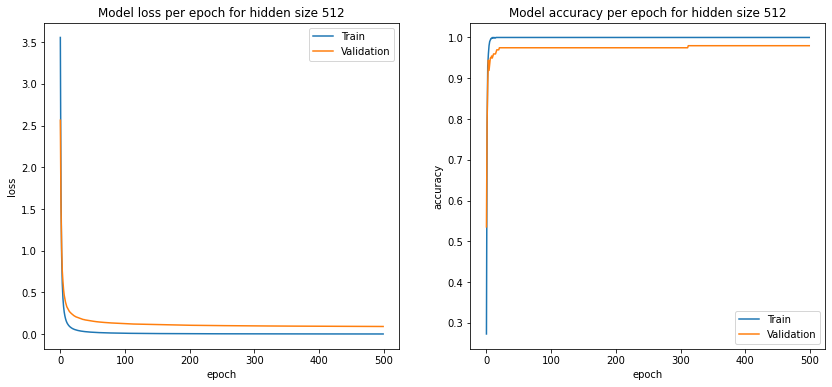

In [140]:
#train model 3
for hidden in hidden_size:
    print('Start training for Hidden size =', str(hidden))
    model = DenseMLP(input_shape= x_train_scaled.shape, hidden_size= hidden, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
    history = training(model, tf.cast(x_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), BATCH_SIZE,
                        OPTIMIZER, None,None)
    train_curves(history,'for hidden size',hidden)
    loss, acc = evaluation(model= model, X= x_train_scaled, y= y_train_encoded, batch_size= BATCH_SIZE)
    print('\nThe Evaluation of the model on the train data is:')
    print('Train loss =',loss)
    print('Train accuracy =', acc)
    print('\nEnd training for Batch size =', str(hidden) + '\n')

So, from above the best hidden size to be used is 256

## Hyperparameters settings #4 : Optimizer type Tuning

We will explore third hyperparameter which is Optimizer while keeping all other hyperparameters fixed

In [141]:
BATCH_SIZE = 32
HIDDEN_SIZE = 256
LEARNING_RATE = 8e-2
optimizer = [Adam(learning_rate=LEARNING_RATE), SGD(learning_rate=LEARNING_RATE), RMSprop(learning_rate=LEARNING_RATE)]
optimizer_name = ['Adam', 'SGD', 'RMSprop']
DROPOUT_RATE = 0
DROPOUT = False

Start training for optimizer: Adam

The Evaluation of the model on the train data is:
Train loss = 0.7697627544403076
Train accuracy = 0.9757575988769531

End training for optimizer: Adam

Start training for optimizer: SGD

The Evaluation of the model on the train data is:
Train loss = 0.022763671353459358
Train accuracy = 0.9929292798042297

End training for optimizer: SGD

Start training for optimizer: RMSprop

The Evaluation of the model on the train data is:
Train loss = 0.31360572576522827
Train accuracy = 0.9808080792427063

End training for optimizer: RMSprop



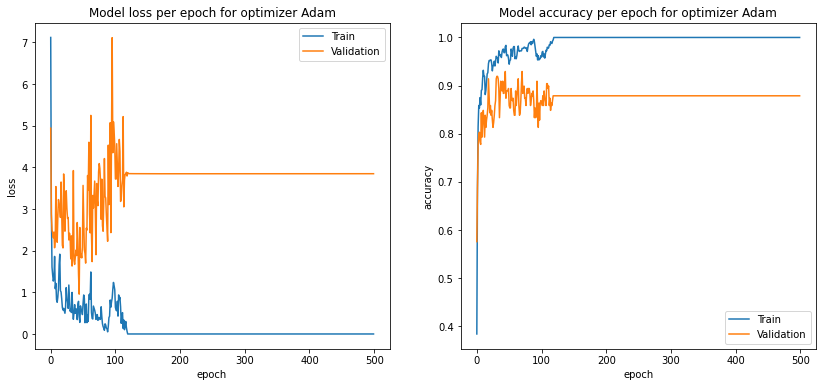

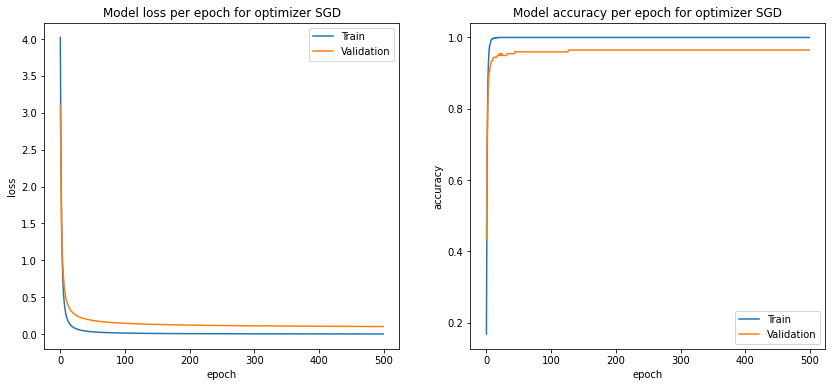

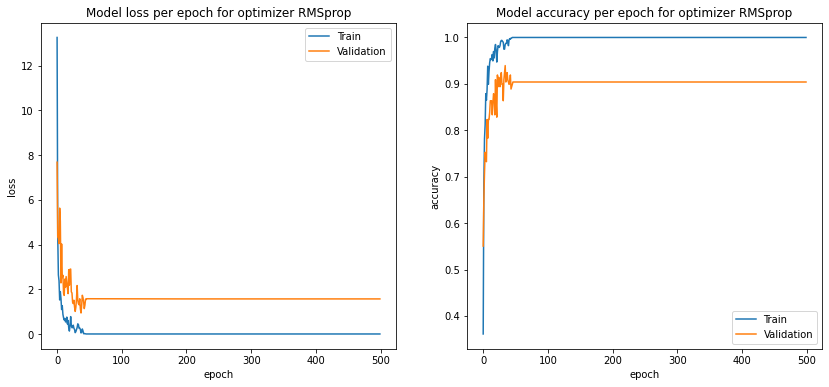

In [142]:
#training model 4
for opt_name, opt in zip(optimizer_name, optimizer):
    print('Start training for optimizer:', str(opt_name))
    model = DenseMLP(input_shape= x_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
    history = training(model, tf.cast(x_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), BATCH_SIZE, 
     opt, None,None)
    train_curves(history,'for optimizer',opt_name)
    loss, acc = evaluation(model= model, X= x_train_scaled, y= y_train_encoded, batch_size= BATCH_SIZE)
    print('\nThe Evaluation of the model on the train data is:')
    print('Train loss =',loss)
    print('Train accuracy =', acc)
    print('\nEnd training for optimizer:', str(opt_name) + '\n')

So, from above the best optimizer to be used is SGD

## now training the final model with the best hyperparameters

In [155]:
BATCH_SIZE = 32
HIDDEN_SIZE = 256
LEARNING_RATE = 8e-2
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
DROPOUT_RATE = 0
DROPOUT = False


The Evaluation of the model on the train data is:
Train loss = 0.02686617709696293
Train accuracy = 0.9929292798042297


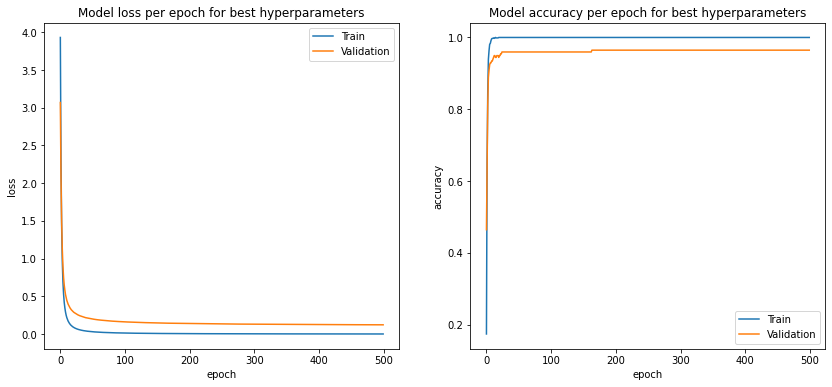

In [156]:
model = DenseMLP(input_shape= x_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
history = training(model, tf.cast(x_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), BATCH_SIZE, 
     OPTIMIZER, None,None)
train_curves(history,'for best hyperparameters',None)
loss, acc = evaluation(model= model, X= x_train_scaled, y= y_train_encoded, batch_size= BATCH_SIZE)
print('\nThe Evaluation of the model on the train data is:')
print('Train loss =',loss)
print('Train accuracy =', acc)

## Model Predictions

In [157]:
predictions = model.predict(x_test_scaled)
sample_submission = pd.read_csv('/content/drive/MyDrive/DL_project1/sample_submission.csv')
sb1 = sample_submission.drop(columns=['id'])
sb2 = sample_submission[['id']]
predictions_df = pd.DataFrame(predictions, index= sb1.index, columns= sb1.columns)
predictions_df = pd.concat([sb2,predictions_df],axis=1)
predictions_df.to_csv('model_test_results.csv',index=False)
predictions_df

19/19 [==============================] - 0s 1ms/step


,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,5.706045e-07,1.302152e-07,2.789611e-09,1.072748e-04,6.354369e-09,8.614927e-09,4.610462e-06,1.240993e-07,7.440174e-08,...,1.327203e-07,1.007611e-04,1.697920e-06,8.098012e-08,2.481429e-06,5.039843e-07,5.554549e-09,2.474351e-08,9.240480e-08,3.955826e-09
1,7,1.443034e-07,4.236805e-07,6.849347e-07,3.165170e-06,2.512739e-07,1.096973e-06,3.536959e-05,5.101529e-07,1.410919e-07,...,2.258045e-08,2.509019e-06,1.592977e-07,1.788159e-08,5.419255e-09,6.088308e-06,2.644668e-07,1.053163e-05,2.692284e-07,1.831073e-05
2,9,7.868997e-06,9.323031e-01,3.145598e-06,5.329103e-06,4.998744e-02,1.486888e-04,6.796709e-06,5.984057e-05,2.079350e-04,...,1.408516e-05,9.806868e-07,1.295088e-06,2.949220e-06,4.165300e-07,6.323722e-05,1.956944e-05,9.496149e-08,3.543323e-07,4.728784e-03
3,12,1.348286e-06,2.127917e-03,2.735159e-06,2.993530e-07,1.005785e-04,5.714252e-07,1.934239e-04,3.857107e-06,8.309535e-05,...,3.131046e-06,1.359350e-06,2.455815e-06,1.765244e-06,2.712352e-06,3.610708e-05,1.059884e-03,3.620773e-07,2.693550e-06,5.127037e-03
4,13,1.043009e-06,6.905092e-06,8.963288e-09,3.695067e-08,2.905488e-06,2.711047e-08,8.226474e-06,7.213460e-06,2.528734e-04,...,4.365443e-05,7.114146e-08,7.323399e-05,8.718200e-07,8.475385e-05,9.861508e-05,5.598614e-04,2.004839e-06,1.377023e-06,8.051887e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,1.173002e-05,9.799344e-01,2.682651e-06,6.978007e-07,1.180575e-02,1.106490e-05,1.389279e-06,1.528480e-05,8.077434e-05,...,2.462143e-06,5.958602e-07,1.312801e-06,1.379584e-06,2.310269e-07,2.245863e-05,3.027570e-05,3.471704e-08,3.342756e-07,2.370343e-03
590,1577,7.360807e-06,3.500779e-06,2.586272e-07,3.682314e-05,8.091010e-07,9.648812e-08,1.348762e-06,5.536355e-05,3.500758e-04,...,8.235717e-07,1.165582e-06,5.742526e-05,5.168717e-08,1.638652e-04,8.377648e-04,2.524918e-05,4.496187e-08,1.440756e-06,2.578411e-05
591,1579,5.418233e-06,7.585749e-07,9.540626e-06,8.742838e-08,5.329279e-06,4.472659e-06,1.149214e-07,7.353300e-07,3.132742e-06,...,1.463903e-08,2.700976e-08,1.409702e-06,2.301848e-07,7.101995e-08,3.183323e-08,3.950355e-07,5.526753e-06,1.281437e-06,1.022471e-05
592,1580,2.306736e-06,1.425791e-05,2.496267e-05,1.021151e-05,3.008781e-04,3.391889e-06,5.477357e-06,2.828918e-04,3.900122e-06,...,1.141058e-05,7.085020e-04,2.409578e-08,1.389897e-03,2.729859e-06,2.261807e-06,1.300571e-06,1.366223e-06,1.223712e-06,1.134567e-05
